# Extracting Frames from the Video

The first step in our snail tracking project is to extract frames from the video. The goal is to create a time series dataset of the snail's environment by extracting one frame per minute.

In [1]:
import cv2
import imageio

# Load the video
video_path = 'IMG_3741.mp4'
cap = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get the frame rate (frames per second) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Calculate the duration of the video in seconds
video_duration = total_frames / fps
print(f"Video duration: {video_duration:.2f} seconds")

# Set the interval to extract 1 frame per minute
interval_seconds = 60  # Interval in seconds (1 minute)

# Calculate the frame interval
frame_interval = int(interval_seconds * fps)  # Number of frames between each sample

extracted_frames = []

# Loop through the video and extract the desired frames
for frame_number in range(0, total_frames, frame_interval):
    # Set the video position to the desired frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    
    # Read the frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # Append the full frame to the list of extracted frames
    extracted_frames.append(frame)
    print(f"Extracted frame at minute: {frame_number // frame_interval}")

# Release the video capture object
cap.release()

# Print the total number of frames extracted
print(f"Total frames extracted: {len(extracted_frames)}")

# Save the frames as a looping GIF
gif_path = 'snail_tracking_full_fast.gif'
imageio.mimsave(gif_path, extracted_frames, duration=1, loop=0)  # 'loop=0' makes the GIF loop indefinitely
print(f"Looping GIF saved to {gif_path}")


Video duration: 1190.54 seconds
Extracted frame at minute: 0
Extracted frame at minute: 1
Extracted frame at minute: 2
Extracted frame at minute: 3
Extracted frame at minute: 4
Extracted frame at minute: 5
Extracted frame at minute: 6
Extracted frame at minute: 7
Extracted frame at minute: 8
Extracted frame at minute: 9
Extracted frame at minute: 10
Extracted frame at minute: 11
Extracted frame at minute: 12
Extracted frame at minute: 13
Extracted frame at minute: 14
Extracted frame at minute: 15
Extracted frame at minute: 16
Extracted frame at minute: 17
Extracted frame at minute: 18
Extracted frame at minute: 19
Total frames extracted: 20
Looping GIF saved to snail_tracking_full_fast.gif


/Users/alexsciuto/Library/Mobile Documents/com~apple~CloudDocs/DataWithAlex/snail-tracker/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/alexsciuto/Library/Mobile Documents/com~apple~CloudDocs/DataWithAlex/snail-tracker/env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Extracted Text: <s_menu><s_nm>


![alt text](snail_tracking_full.gif)

## Explanation

- This code loads a video file and calculates its duration by dividing the total number of frames by the frame rate.

- It then extracts one frame per minute and stores them in the extracted_frames list.

- Finally, the extracted frames are saved as a looping GIF.

### Output

A GIF named snail_tracking_full_fast.gif is created, which loops indefinitely and shows the frames extracted at 1-minute intervals.

# Extracting Frames from a Specific Region of Interest (ROI)

Next, we refine the frame extraction to focus on a specific region within each frame, which contains the data of interest (temperature and humidity readings).



In [2]:
import cv2
import imageio

# Load the video
video_path = 'IMG_3741.mp4'
cap = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get the frame rate (frames per second) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Calculate the duration of the video in seconds
video_duration = total_frames / fps
print(f"Video duration: {video_duration:.2f} seconds")

# Set the interval to extract 1 frame per minute
interval_seconds = 60  # Interval in seconds (1 minute)

# Calculate the frame interval
frame_interval = int(interval_seconds * fps)  # Number of frames between each sample

# Define the ROI coordinates
x1, x2 = 1173, 1458  # Horizontal coordinates
y1, y2 = 6, 149      # Vertical coordinates

extracted_frames = []

# Loop through the video and extract the desired frames
for frame_number in range(0, total_frames, frame_interval):
    # Set the video position to the desired frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    
    # Read the frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # Extract the Region of Interest (ROI) from the frame
    roi = frame[y1:y2, x1:x2]
    
    # Append the ROI to the list of extracted frames
    extracted_frames.append(roi)
    print(f"Extracted ROI frame at minute: {frame_number // frame_interval}")

# Release the video capture object
cap.release()

# Print the total number of frames extracted
print(f"Total ROI frames extracted: {len(extracted_frames)}")

# Save the frames as a looping GIF
gif_path = 'snail_tracking_roi.gif'
imageio.mimsave(gif_path, extracted_frames, duration=1, loop=0)  # 'loop=0' makes the GIF loop indefinitely
print(f"Looping ROI GIF saved to {gif_path}")


Video duration: 1190.54 seconds
Extracted ROI frame at minute: 0
Extracted ROI frame at minute: 1
Extracted ROI frame at minute: 2
Extracted ROI frame at minute: 3
Extracted ROI frame at minute: 4
Extracted ROI frame at minute: 5
Extracted ROI frame at minute: 6
Extracted ROI frame at minute: 7
Extracted ROI frame at minute: 8
Extracted ROI frame at minute: 9
Extracted ROI frame at minute: 10
Extracted ROI frame at minute: 11
Extracted ROI frame at minute: 12
Extracted ROI frame at minute: 13
Extracted ROI frame at minute: 14
Extracted ROI frame at minute: 15
Extracted ROI frame at minute: 16
Extracted ROI frame at minute: 17
Extracted ROI frame at minute: 18
Extracted ROI frame at minute: 19
Total ROI frames extracted: 20
Looping ROI GIF saved to snail_tracking_roi.gif


![alt text](snail_tracking_roi.gif)

### Explanation

- The code performs the same operation as the previous one, but only extracts the region of interest (ROI) where the temperature and humidity readings are present.

- The extracted ROI frames are saved as a looping GIF named snail_tracking_roi.gif.

### Output

A GIF named `snail_tracking_roi.gif` is created, looping indefinitely and showing the extracted region of interest frames at 1-minute intervals.

# Using OpenAI API to Extract Data from the Frames

Now, we use the OpenAI API to analyze the extracted frames and extract humidity and temperature values.

I am going to start by setting my API, key. 



In [3]:
import cv2
import base64
import requests
import pandas as pd
from datetime import datetime
from dotenv import load_dotenv
import os

# Load environment variables from the .env file
load_dotenv()

# Retrieve the OpenAI API key from the environment
api_key = os.getenv("OPENAI_API_KEY")

# Check if the API key was loaded correctly
if not api_key:
    raise ValueError("OpenAI API key is not set. Please check your .env file.")


In [4]:
import cv2
import base64
import requests
import pandas as pd
from datetime import datetime

# Load the video
video_path = 'IMG_3741.mp4'
cap = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get the frame rate (frames per second) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Calculate the duration of the video in seconds
video_duration = total_frames / fps
print(f"Video duration: {video_duration:.2f} seconds")

# Set the interval to extract 1 frame per minute
interval_seconds = 60  # Interval in seconds (1 minute)

# Calculate the frame interval
frame_interval = int(interval_seconds * fps)  # Number of frames between each sample

# Define the ROI coordinates
x1, x2 = 1173, 1458  # Horizontal coordinates
y1, y2 = 6, 149      # Vertical coordinates

# Initialize a list to store extracted data
data = {
    'Timestamp': [],
    'Humidity (%)': [],
    'Temperature (°F)': []
}

# Loop through the video and extract the desired frames
for frame_number in range(0, total_frames, frame_interval):
    # Set the video position to the desired frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    
    # Read the frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # Extract the Region of Interest (ROI) from the frame
    roi = frame[y1:y2, x1:x2]
    
    # Encode the ROI as a base64 string
    _, buffer = cv2.imencode('.png', roi)
    base64_image = base64.b64encode(buffer).decode('utf-8')

    # Prepare headers for the OpenAI API request
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {api_key}"
    }

    # Create the payload for the API request
    payload = {
        "model": "gpt-4o-mini",  # Use the appropriate model variant
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "Extract the humidity and temperature values from this image. Please format the response as 'Humidity: [value]%, Temperature: [value]°F'."
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/png;base64,{base64_image}"
                        }
                    }
                ]
            }
        ],
        "max_tokens": 100
    }

    # Send the request to the OpenAI API
    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

    # Extract the text from the API response
    response_data = response.json()
    
    # Ensure the response has the correct format
    if 'choices' in response_data and len(response_data['choices']) > 0:
        text_content = response_data['choices'][0]['message']['content']

        # Check if the expected format is in the response
        if "Humidity:" in text_content and "Temperature:" in text_content:
            # Parse the extracted text to get humidity and temperature
            extracted_values = text_content.split(", ")

            try:
                # Extract humidity and temperature using the updated prompt format
                humidity_str = extracted_values[0].split(":")[1].strip().replace('%', '')
                temperature_str = extracted_values[1].split(":")[1].strip().replace('°F', '')

                humidity = int(humidity_str)
                temperature = float(temperature_str)

                # Append the data with the current timestamp
                timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                data['Timestamp'].append(timestamp)
                data['Humidity (%)'].append(humidity)
                data['Temperature (°F)'].append(temperature)

                print(f"Extracted data for frame at minute: {frame_number // frame_interval}")
                print(f"Timestamp: {timestamp}, Humidity: {humidity}%, Temperature: {temperature}°F")

            except (ValueError, IndexError) as e:
                print(f"Error parsing extracted text: {text_content}")
                print(f"Error details: {e}")
                continue
        else:
            print(f"Unexpected format in API response: {text_content}")
    else:
        print("No valid response from the API or unexpected response format.")

# Release the video capture object
cap.release()

# Convert the data dictionary to a DataFrame
df = pd.DataFrame(data)

# Write the DataFrame to a CSV file
df.to_csv('snail_data.csv', index=False)

# Print the DataFrame
print(df)


Video duration: 1190.54 seconds
Extracted data for frame at minute: 0
Timestamp: 2024-09-10 11:44:41, Humidity: 92%, Temperature: 71.4°F
Extracted data for frame at minute: 1
Timestamp: 2024-09-10 11:44:43, Humidity: 92%, Temperature: 71.4°F
Extracted data for frame at minute: 2
Timestamp: 2024-09-10 11:44:45, Humidity: 92%, Temperature: 71.4°F
Extracted data for frame at minute: 3
Timestamp: 2024-09-10 11:44:46, Humidity: 92%, Temperature: 71.5°F
Error parsing extracted text: Humidity: 92%, Temperature: 71.5°F.
Error details: could not convert string to float: '71.5.'
Extracted data for frame at minute: 5
Timestamp: 2024-09-10 11:44:50, Humidity: 92%, Temperature: 71.6°F
Error parsing extracted text: Humidity: 92%, Temperature: 71.5°F.
Error details: could not convert string to float: '71.5.'
Error parsing extracted text: Humidity: 92%, Temperature: 71.6°F.
Error details: could not convert string to float: '71.6.'
Extracted data for frame at minute: 8
Timestamp: 2024-09-10 11:44:55, H

## Explanation:

- This code uses the OpenAI API to extract the temperature and humidity from each frame.
It sends the ROI as a base64-encoded image to the API, asking it to extract the relevant information.

- The extracted data is stored in a DataFrame and then saved as a CSV file for further analysis.
Output:

- A CSV file named snail_data.csv is created with columns for the timestamp, humidity, and temperature.

## Output:

A CSV file named `snail_data.csv` is created with columns for the timestamp, humidity, and temperature.

# Plotting the Extracted Data

Finally, we visualize the extracted temperature and humidity data using a line plot.

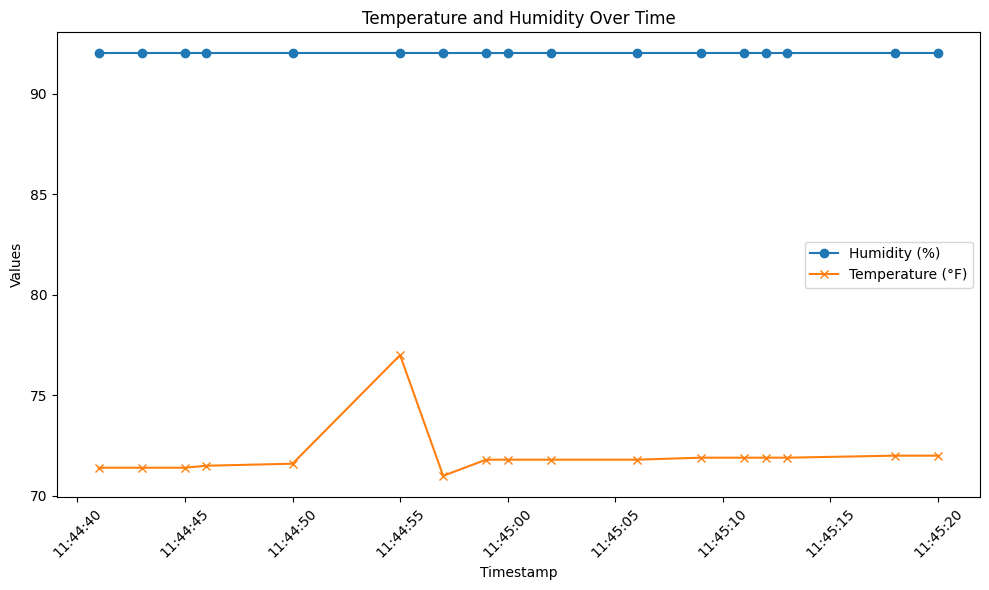

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('snail_data.csv')

# Convert the Timestamp column to datetime format for better plotting
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot the data
plt.figure(figsize=(10, 6))

# Plot humidity
plt.plot(df['Timestamp'], df['Humidity (%)'], label='Humidity (%)', linestyle='-', marker='o')

# Plot temperature
plt.plot(df['Timestamp'], df['Temperature (°F)'], label='Temperature (°F)', linestyle='-', marker='x')

# Set the title and labels
plt.title('Temperature and Humidity Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


## Explanation

- This code reads the snail_data.csv file and plots two lines: one for humidity and one for temperature, using different markers and colors.

- The x-axis represents time, and the y-axis represents the values for humidity and temperature.

## Output

A line plot is displayed, showing the changes in temperature and humidity over time.

# Conclusion

This notebook documents the steps to extract frames from a video, analyze specific regions of interest, extract data using OpenAI's API, and visualize the results. These techniques are valuable for time-series analysis of environmental data in a controlled experiment, such as tracking snail behavior under different conditions.

# Future Directions

- Optimize API calls to minimize costs.

- Automate the entire pipeline for real-time data monitoring and analysis.

- Experiment with different machine learning models to predict snail behavior based on environmental changes.